In [33]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import os
import glob
from sklearn.preprocessing import MinMaxScaler

In [34]:
# load and save functions
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name , 'rb') as f:
        return pd.DataFrame(pickle.load(f))

In [35]:
# load all spectra in internal memory 
locationSpectra = 'spectra_matched/'
filenames = glob.glob(locationSpectra+'*pkl')

cut_off = 5000

X = np.zeros((len(filenames),cut_off))
X_scaled = np.zeros((len(filenames),cut_off,1))
y = []

sc = MinMaxScaler()
counter_excluded = 0
for i in range(len(filenames)):
    df_current = load_obj(filenames[i])
    l = len(df_current['flux'])
    X[i][0:l] = df_current['flux'][0:l]
    
    # Scale result in new array
    X_scaled[i] = sc.fit_transform(X[i].reshape(cut_off,1))
    
    y.append(df_current['class'].iloc[0])
X = X[0:(len(X)-counter_excluded)]
y = np.array(y)

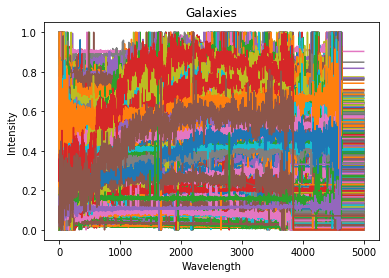

In [39]:
# plot galaxies
idx_galaxy = (y == 'GALAXY')
X_galaxy = X_scaled[idx_galaxy]

fig = plt.figure()
for elem in X_galaxy:
    plt.plot(elem)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Galaxies')
plt.savefig('spec_plots/scaled/galaxies_flux.png')
plt.show()

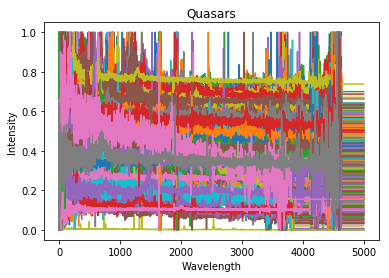

In [40]:
# plot quasars
idx_qso = (y == 'QSO   ')
X_qso = X_scaled[idx_qso]

fig = plt.figure()
for elem in X_qso:
    plt.plot(elem)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Quasars')
plt.savefig('spec_plots/scaled/quasars_flux.png')
plt.show()

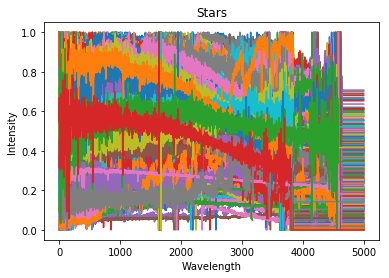

In [41]:
# plot stars
idx_stars = (y == 'STAR  ')
X_stars = X_scaled[idx_stars]

fig = plt.figure()
for elem in X_stars:
    plt.plot(elem)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Stars')
plt.savefig('spec_plots/scaled/stars_flux.png')
plt.show()